In [2]:
from tensorflow.keras.datasets import reuters
import keras
import numpy as np

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2025-02-03 16:03:08.208224: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-03 16:03:08.342515: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-03 16:03:08.503688: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738587788.703846    4392 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738587788.776496    4392 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-03 16:03:09.170298: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [3]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequense in enumerate(sequences):
        for j in sequense:
            results[i, j] = 1
    return results
    
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
def to_one_hot(labels, dimension=46):
    result = np.zeros(len(labels), dimension)
    for i, label in enumerate(labels):
        result[i, label] = 1
    return result

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [16]:
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [17]:
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [7]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [18]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 10,
    batch_size = 512,
    validation_data=(x_val, y_val)
)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 287ms/step - accuracy: 0.2824 - loss: 3.2946 - val_accuracy: 0.6050 - val_loss: 1.8349
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 255ms/step - accuracy: 0.6680 - loss: 1.6512 - val_accuracy: 0.7050 - val_loss: 1.3689
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 223ms/step - accuracy: 0.7284 - loss: 1.2221 - val_accuracy: 0.7310 - val_loss: 1.2317
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 203ms/step - accuracy: 0.7742 - loss: 1.0071 - val_accuracy: 0.7600 - val_loss: 1.1291
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 202ms/step - accuracy: 0.8173 - loss: 0.8252 - val_accuracy: 0.7730 - val_loss: 1.0371
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 202ms/step - accuracy: 0.8436 - loss: 0.6846 - val_accuracy: 0.7930 - val_loss: 1.0189
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 203ms/step - accuracy: 0.8759 - loss: 0.5577 - val_accuracy: 0.7860 - val_loss: 0.9931
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 203ms/step - accuracy: 0.9010 - loss: 0.4620 - val_accuracy: 0

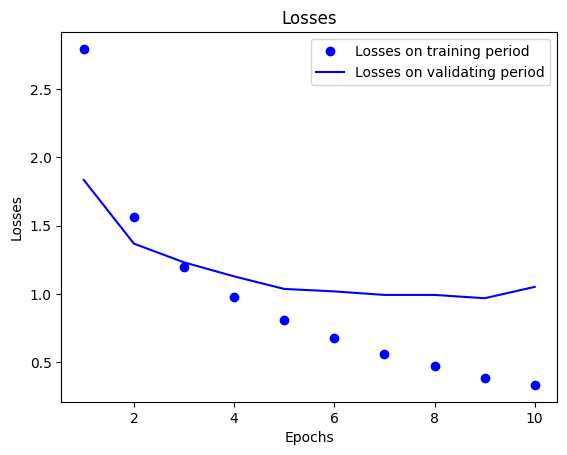

In [19]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, "bo", label="Losses on training period")
plt.plot(epochs, val_loss, "b", label="Losses on validating period")
plt.title("Losses")
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.legend()
plt.show()

In [10]:
predicctions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [11]:
np.argmax(predicctions[0])

np.int64(3)